In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
df2 = pd.read_csv('outputs/ncaab_comebacks_v1.csv')
df2 = df2[df2['deficit']<=0]
print(len(df2))

2553


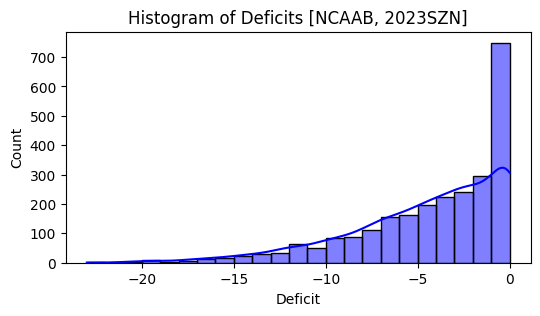

In [26]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(6, 3))

sns.histplot(
    df['deficit'], 
    bins=max(df['deficit']) - min(df['deficit']),
    kde=True, 
    color='blue'
)

plt.title(f"Histogram of Deficits [NCAAB, 2023SZN]")
plt.xlabel("Deficit")

plt.savefig("images/2023_NCAAB_DeficitHistogram_v1", dpi=300)

plt.show()

In [27]:
min_val = df['deficit'].min()
min_val = min_val - (min_val%5)
max_val = df['deficit'].max()
bins = np.arange(min_val, max_val + 5, 5)  # Creates bins with width 5

# Compute histogram
counts, bin_edges = np.histogram(df['deficit'], bins=bins)

# Create a DataFrame with bin ranges and counts
hist_table = pd.DataFrame({
    'Range': [f"[{bin_edges[i]:.1f}, {bin_edges[i+1]:.1f})" for i in range(len(bin_edges) - 1)],
    'Count': counts
})
hist_table['Percent'] = hist_table['Count'] / len(df) * 100
hist_table

,Range,Count,Percent
0,"[-25.0, -20.0)",2,0.078370
1,"[-20.0, -15.0)",50,1.959248
2,"[-15.0, -10.0)",197,7.719436
3,"[-10.0, -5.0)",599,23.471787
4,"[-5.0, 0.0)",1704,66.771160


period
1    1855
2     688
3       8
4       1
dtype: int64
period
1    0.726881
2    0.269592
3    0.003135
4    0.000392
dtype: float64


Text(0, 0.5, 'Count')

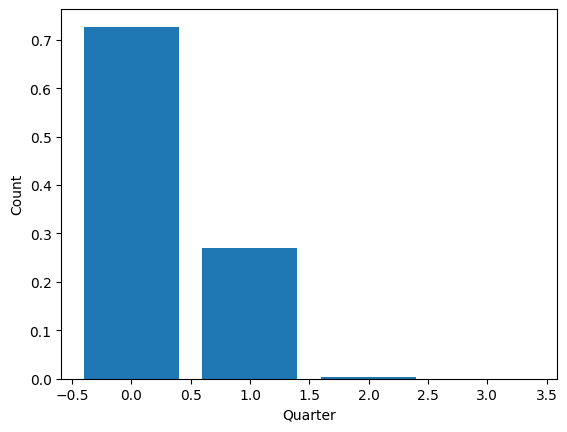

In [28]:
quarters = df.groupby('period').size()
quarter_pct = quarters/len(df)
print(quarters)
print(quarter_pct)

plt.bar(
    height=quarter_pct,
    x=np.arange(0,4)
)

# plt.bar_label(quarter_pct)

plt.xlabel("Quarter")
plt.ylabel("Count")

In [42]:
df2['color'] = df2['analytical_diff'].apply(lambda x: 'breaks rule' if x > 0 else 'follows rule')
df2

,Unnamed: 0,game title,date,winning_team,deficit,period,clock,seconds_remaining,analytical_lead_minus_five_abs,analytical_time_required,analytical_diff,color
0,1779,Furman Paladins at Tulane Green Wave,12/14/2023,Tulane Green Wave,-3,2,0:00:30,0.3,0,0,-0.3,follows rule
1,1493,Yale Bulldogs at Vermont Catamounts,12/2/2023,Vermont Catamounts,-3,2,0.000694444,0.6,0,0,-0.6,follows rule
2,52,Georgia Tech Yellow Jackets at Wake Forest Dem...,3/5/2024,Georgia Tech Yellow Jackets,-1,2,0:03:20,3.2,0,0,-3.2,follows rule
3,259,Holy Cross Crusaders at Harvard Crimson,12/21/2023,Harvard Crimson,0,2,0:03:40,3.4,0,0,-3.4,follows rule
4,1335,Texas A&M Aggies at Arkansas Razorbacks,1/16/2024,Arkansas Razorbacks,-1,2,0.005555556,7.6,0,0,-7.6,follows rule
...,...,...,...,...,...,...,...,...,...,...,...,...
2694,1964,Hampton Pirates at William & Mary Tribe,3/2/2024,William & Mary Tribe,0,1,19:51:00,2391.0,0,0,-2391.0,follows rule
2695,1551,Gwynedd Mercy at Wagner Seahawks,12/22/2023,Wagner Seahawks,0,1,19:53:00,2393.0,0,0,-2393.0,follows rule
2696,977,Fordham Rams vs Abilene Christian Wildcats,11/19/2023,Abilene Christian Wildcats,0,1,19:56:00,2396.0,0,0,-2396.0,follows rule
2697,1720,Central Penn at Appalachian State Mountaineers,12/5/2023,Appalachian State Mountaineers,0,1,19:56:00,2396.0,0,0,-2396.0,follows rule


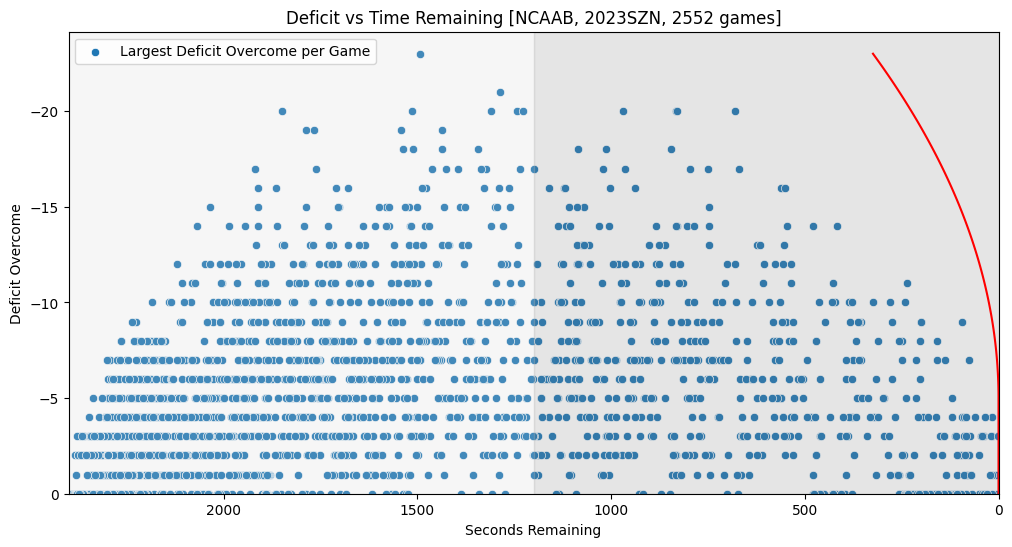

In [45]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='seconds_remaining', y='deficit', label='Largest Deficit Overcome per Game')

# Reverse the y-axis (negative numbers on top)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# Customizing the plot
plt.title(f"Deficit vs Time Remaining [NCAAB, 2023SZN, {len(df)} games]")
plt.xlabel("Seconds Remaining")
plt.ylabel("Deficit Overcome")

# plot the function
y_values = np.linspace(df['deficit'].min(), df['deficit'].max(), 100)  # Generate 100 points for smooth line
x_values = np.where(y_values >= -5, 0, (y_values + 5) ** 2)

plt.plot(x_values, y_values, color='red', label='Analytical Victory Line')

# plot gray boxes
plt.axvspan(0, 20*60, color="gray", alpha=0.2)
plt.axvspan(20*60, 40*60, color="lightgray", alpha=0.2)

# limit x-axis to only 4 quarters
plt.xlim(40*60, 0)
plt.ylim(bottom=0)
# plt.legend()

# Save
plt.savefig("images/2023_NCAAB_v1", dpi=300)

# Show the plot
plt.show()
